In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [74]:
data=pd.read_csv('C:/Users/User/Documents/data/Datasets/facebook_ads_data.csv')
data

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817
...,...,...,...,...,...,...,...,...,...,...
1489,2020-11-15,Discounts,6.98,12465,657,10.96,0.01,0.56,0.052708,1.570201
1490,2020-11-14,Discounts,7.27,5005,392,12.67,0.02,1.45,0.078322,1.742779
1491,2020-11-13,Discounts,6.36,11669,451,9.77,0.01,0.55,0.038649,1.536164
1492,2020-11-12,Discounts,23.00,10473,397,21.13,0.06,2.20,0.037907,0.918696


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1494 non-null   object 
 1   campaign_name      1494 non-null   object 
 2   total_spend        1494 non-null   float64
 3   total_impressions  1494 non-null   int64  
 4   total_clicks       1494 non-null   int64  
 5   total_value        1494 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1462 non-null   float64
 8   ctr                1462 non-null   float64
 9   romi               1462 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 116.8+ KB


In [76]:
data_nonan=data.dropna()
data_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1443 entries, 2 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1443 non-null   object 
 1   campaign_name      1443 non-null   object 
 2   total_spend        1443 non-null   float64
 3   total_impressions  1443 non-null   int64  
 4   total_clicks       1443 non-null   int64  
 5   total_value        1443 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1443 non-null   float64
 8   ctr                1443 non-null   float64
 9   romi               1443 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 124.0+ KB


## Data Analysis ##
1. Зроби групування даних по дням та для згрупованих даних побудуй два графіки:
 - Графік з щоденною сумою витрат на рекламу в 2021 році;
 - Графік з щоденним ROMI в 2021 році.
ПІДКАЗКА
Ти можеш порівнювати та фільтрувати дати навіть без конвертації значень полів. Наприклад, спробуй порівняти значення “ad_date” з текстом '2022-01-01'

БОНУСНИЙ ПУНКТ
Застосуй метод rolling() щоб відобразити рухоме середнє витрат та ROMI)

2. Зроби групування даних за назвою кампанії побудуй два графіки:
 - Графік загальної суми витрат на рекламу в кожній з кампаній;
 - Загальний ROMI в кожній з кампаній.

3. За допомогою box plot визнач, яким був розкид щоденного ROMI в кожній кампаній (за назвою кампанії.)

4. Побудуй гістограму з розподілом значень ROMI в таблиці facebook_ads_data.csv

5. Побудуй теплову карту кореляції між усіма числовими показниками в таблиці facebook_ads_data.csv. Які показники мають найвищу та найнижчу кореляцію? З чим корелює "total_value"?

6. Побудуй точкову діаграму з лінійною регресією (для цього ти можеш використати функцію lmplot()), що побудована на даних з "total_spend" та "total_value" щоб візуалізувати звʼязок між цими величинами.


#### 1. Зроби групування даних по дням та для згрупованих даних побудуй два графіки:
 - Графік з щоденною сумою витрат на рекламу в 2021 році;
 - Графік з щоденним ROMI в 2021 році.
ПІДКАЗКА
Ти можеш порівнювати та фільтрувати дати навіть без конвертації значень полів. Наприклад, спробуй порівняти значення “ad_date” з текстом '2022-01-01'

БОНУСНИЙ ПУНКТ
Застосуй метод rolling() щоб відобразити рухоме середнє витрат та ROMI)

In [77]:
# select data for 2021 only
date_2021=data.loc[data['ad_date'].between('2021-01-01','2021-12-31')]
date_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, 274 to 1440
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1167 non-null   object 
 1   campaign_name      1167 non-null   object 
 2   total_spend        1167 non-null   float64
 3   total_impressions  1167 non-null   int64  
 4   total_clicks       1167 non-null   int64  
 5   total_value        1167 non-null   float64
 6   cpc                1135 non-null   float64
 7   cpm                1154 non-null   float64
 8   ctr                1154 non-null   float64
 9   romi               1154 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 100.3+ KB


In [78]:
date_2021=date_2021.groupby('ad_date').agg({'total_spend':'sum','total_value':'sum'})
date_2021['d_romi']=date_2021['total_value']/date_2021['total_spend']
date_2021

,total_spend,total_value,d_romi
ad_date,,,
2021-01-01,0.39,0.59,1.512821
2021-01-02,7.74,6.90,0.891473
2021-01-04,70.06,68.47,0.977305
2021-01-05,81.15,61.68,0.760074
2021-01-06,142.77,145.97,1.022414
...,...,...,...
2021-12-27,478.31,686.47,1.435199
2021-12-28,359.83,450.47,1.251897
2021-12-29,163.25,171.76,1.052129


In [79]:
date_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329 entries, 2021-01-01 to 2021-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_spend  329 non-null    float64
 1   total_value  329 non-null    float64
 2   d_romi       327 non-null    float64
dtypes: float64(3)
memory usage: 10.3+ KB


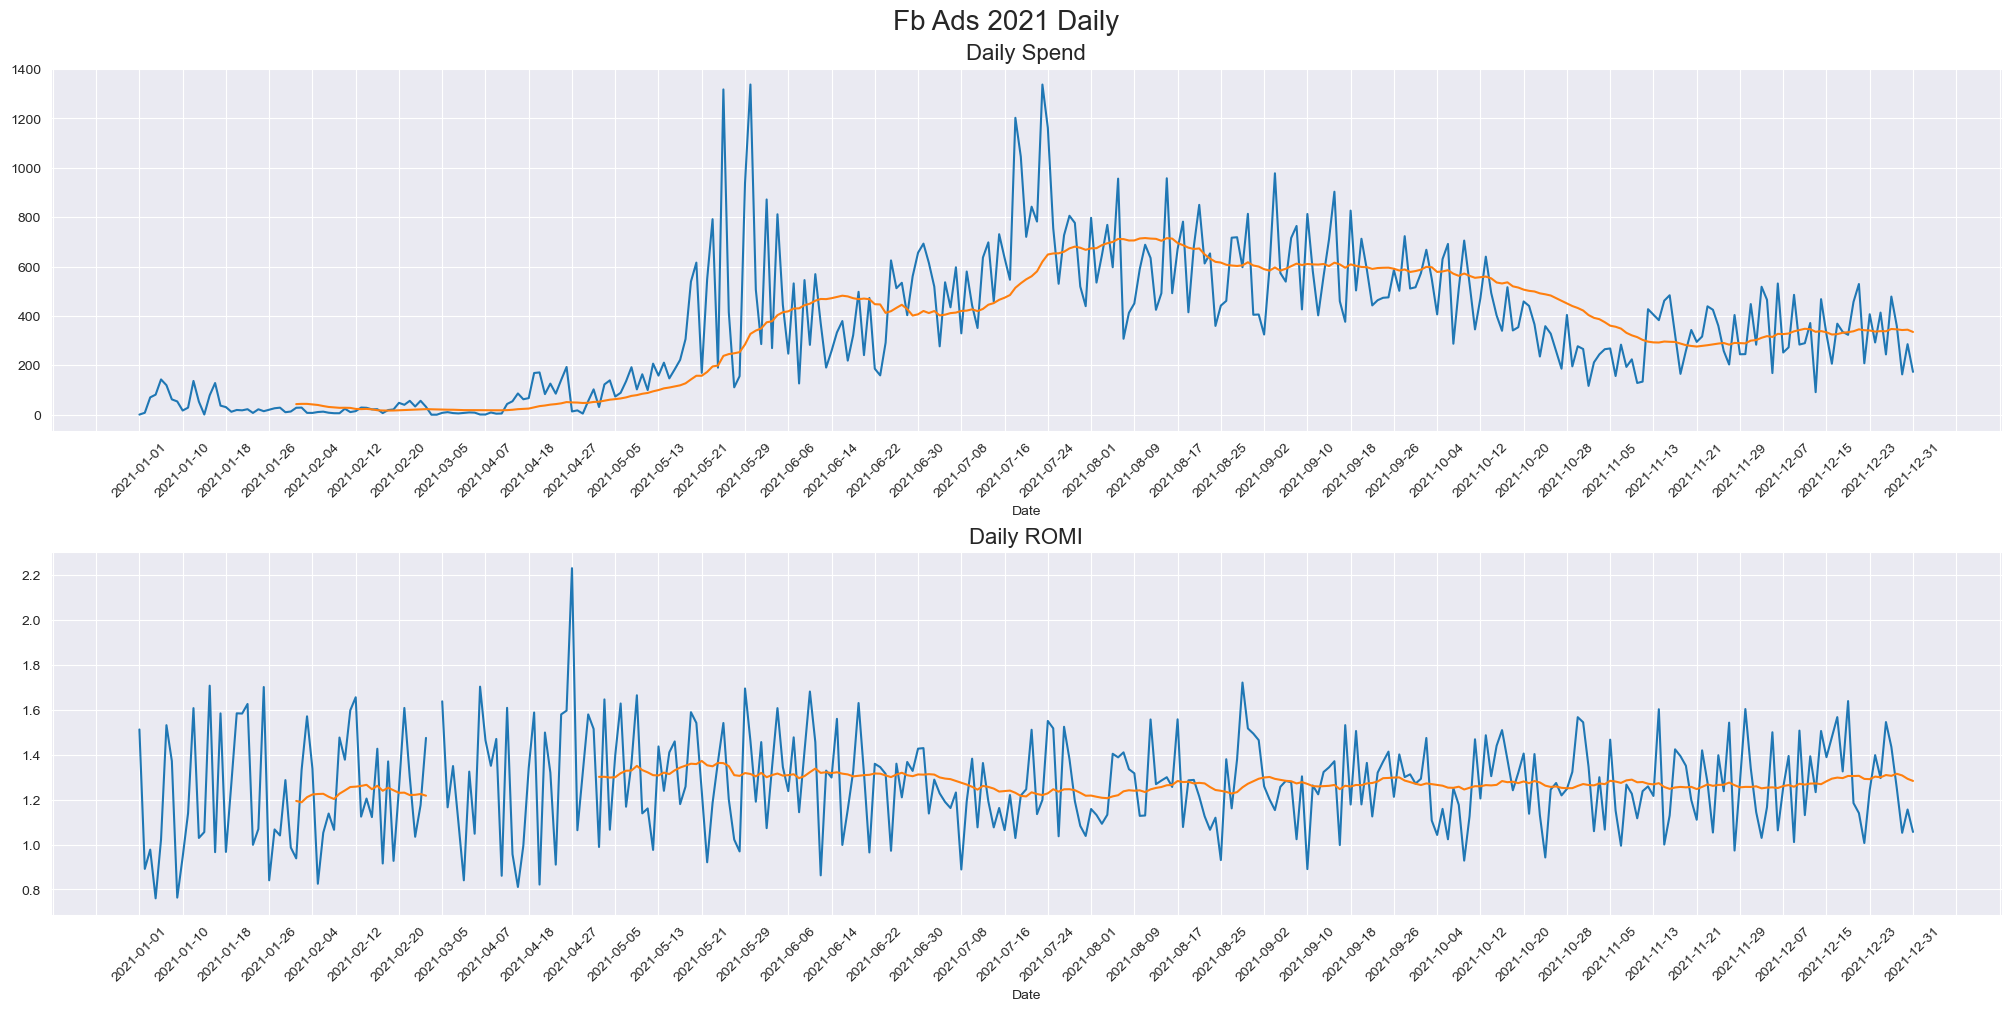

In [80]:
fig, axs=plt.subplots(2,1, figsize=(20, 10), constrained_layout = True)
plt.suptitle('Fb Ads 2021 Daily', fontsize=20)
plt.xlabel('Date')

axs[0].plot(date_2021['total_spend'], label='Daily Spend')
axs[0].plot(date_2021['total_spend'].rolling(30).mean())
axs[0].set_title('Daily Spend', fontsize=16)
axs[0].xaxis.set_major_locator(plt.MaxNLocator(50))
axs[0].tick_params(axis='x',labelrotation=45)
axs[0].set_xlabel('Date')

axs[1].plot(date_2021['d_romi'], label='Daily ROMI')
axs[1].plot(date_2021['d_romi'].rolling(30).mean())
axs[1].set_title('Daily ROMI', fontsize=16)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(50))
axs[1].tick_params(axis='x',labelrotation=45)

plt.show() 

#### 2. Зроби групування даних за назвою кампанії побудуй два графіки:
 - Графік загальної суми витрат на рекламу в кожній з кампаній;
 - Загальний ROMI в кожній з кампаній.

In [99]:
data_camp=data.groupby('campaign_name').agg({'total_spend':'sum', 'total_value':'sum'})
data_camp['romi']=data_camp['total_value']/data_camp['total_spend']
data_camp.index
data_camp

,total_spend,total_value,romi
campaign_name,,,
Brand,539.92,670.15,1.241202
Crazy discounts,2175.29,2583.59,1.187699
Discounts,2856.39,3516.27,1.231019
Electronics,23920.42,29169.38,1.219434
Expansion,67212.82,83288.66,1.239178
Hobbies,11326.97,13974.63,1.233748
Lookalike,63631.09,80234.70,1.260935
New items,2936.97,3742.05,1.274119
Promos,4993.84,8793.77,1.760923


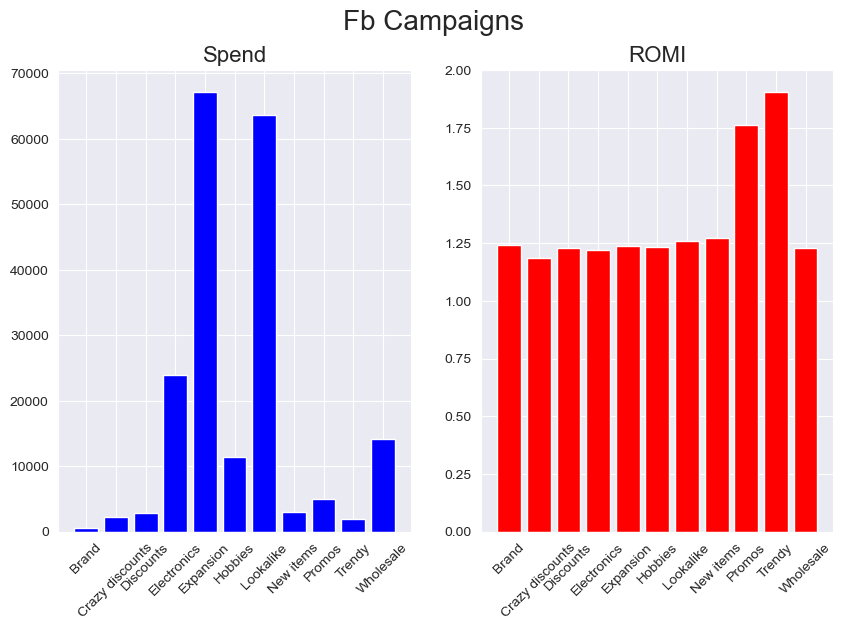

In [82]:
fig, [ax1,ax2]=plt.subplots(1,2, figsize=(10, 6))
plt.suptitle('Fb Campaigns', fontsize=20)
#fig.text(0.5,-0.05, "Campaign", fontsize="small")

x=data_camp.index
y1=data_camp['total_spend']
y2=data_camp['romi']

ax1.bar(x,y1, label='Spend', color='blue')
ax1.tick_params(axis='x',labelrotation=45)
ax1.set_title('Spend', fontsize=16)

ax2.bar(x,y2, label='ROMI', color='red')
ax2.tick_params(axis='x',labelrotation=45)
ax2.set_title('ROMI', fontsize=16)

plt.show()

In [100]:
data_camp.index

Index(['Brand', 'Crazy discounts', 'Discounts', 'Electronics', 'Expansion',
       'Hobbies', 'Lookalike', 'New items', 'Promos', 'Trendy', 'Wholesale'],
      dtype='object', name='campaign_name')

In [139]:
# Create the function that adds labels to the bars
# function to add value labels
def addlabels_ax1(x,y):
    for i in range(len(x)):
        plt.text(i - 0.3,y[i],y[i], ha = 'center', rotation=None, color='blue')

def addlabels_ax2(x,y):
    for i in range(len(x)):
        plt.text(i  + 0.1,y[i],y[i], ha = 'center', rotation=None, color='red')

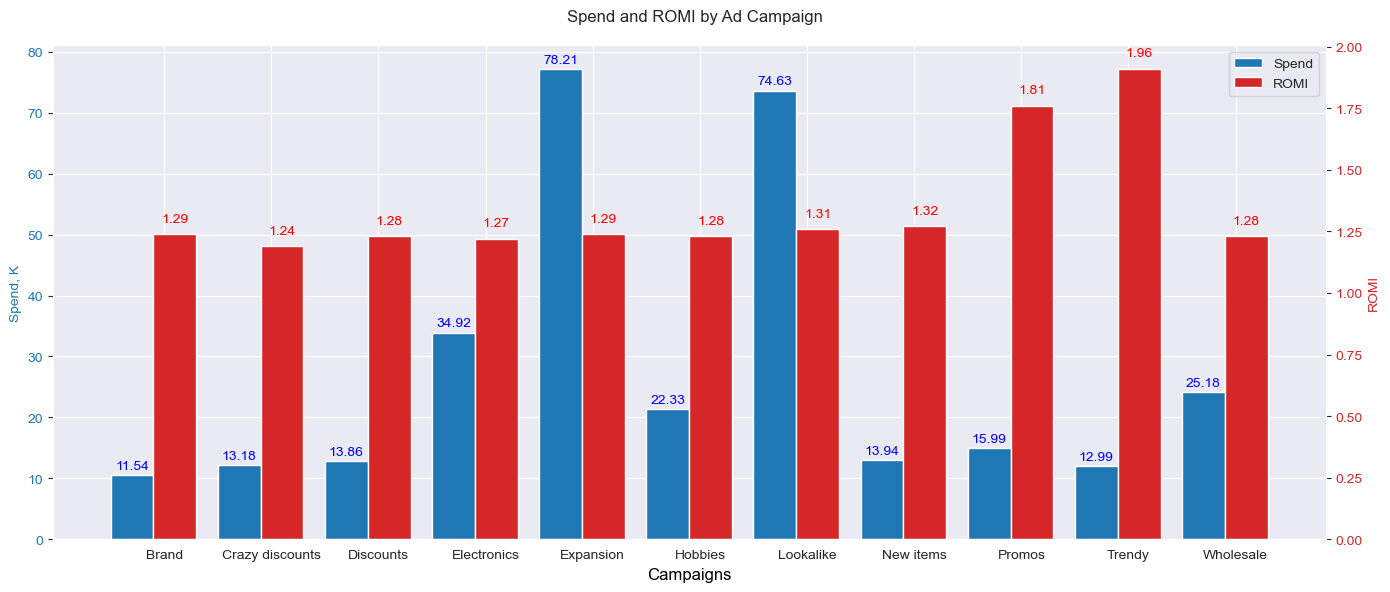

In [145]:
#one graph with 2 y-axes with different scales
x=data_camp.index
y1=(data_camp['total_spend']/1000).round(2)
y2=data_camp['romi'].round(2)
x_axis = np.arange(len(x))

fig=plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(111) # 
color = 'tab:blue'
ax1.set_xlabel('Campaigns', color='black', fontsize=12 )
ax1.set_ylabel('Spend, K', color=color)
ax1.bar(x_axis  - 0.3, y1 + 10, width=0.4, color=color, label='Spend')
addlabels_ax1(x, y1+11)
ax1.tick_params(axis='y', labelcolor=color )
#ax1.x

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('ROMI', color=color)  # we already handled the x-label with ax1
ax2.bar(x_axis  + 0.1, y2, width=0.4, color=color, label='ROMI')
addlabels_ax2(x, y2+0.05)
ax2.grid()
ax2.tick_params(axis='y', labelcolor=color)

# ask matplotlib for the plotted objects and their labels
bars1, labels1 = ax1.get_legend_handles_labels()
bars2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(bars1 + bars2, labels1 + labels2, loc=0)

plt.xticks(x_axis, x)
plt.suptitle('Spend and ROMI by Ad Campaign')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


#### 3. За допомогою box plot визнач, яким був розкид щоденного ROMI в кожній кампаній (за назвою кампанії.)


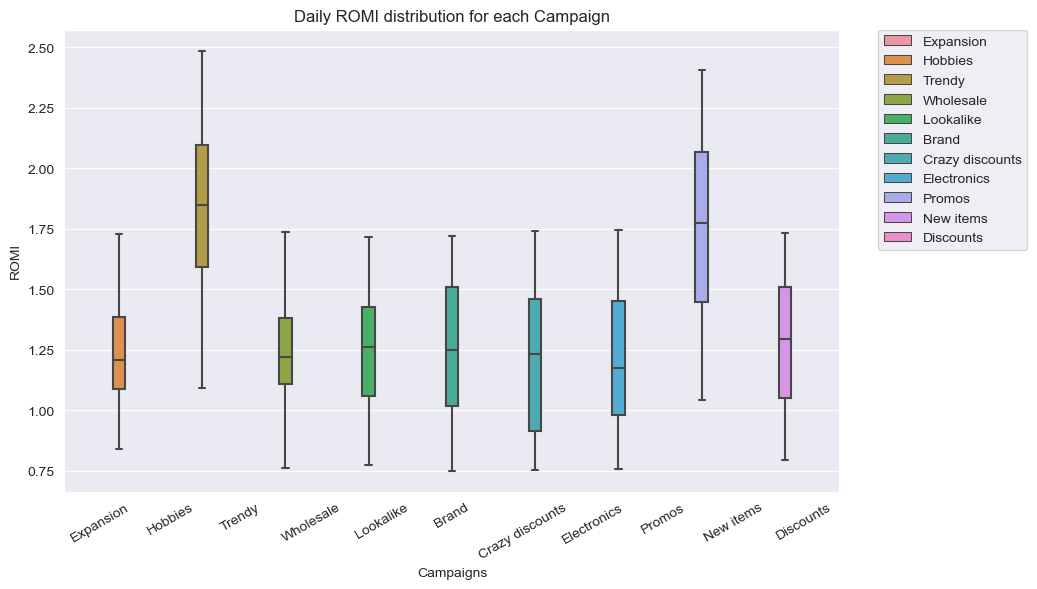

In [85]:
fig=plt.figure(figsize=(10,6))

ax=sns.boxplot(x='campaign_name', y='romi', data=data,  width=2, hue='campaign_name')
#add ax= to rename axes labels
# add label to the axis and label to the plot
ax.set(xlabel ="Campaigns", ylabel = "ROMI", title ='Daily ROMI distribution for each Campaign')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

#### 4. Побудуй гістограму з розподілом значень ROMI в таблиці facebook_ads_data.csv

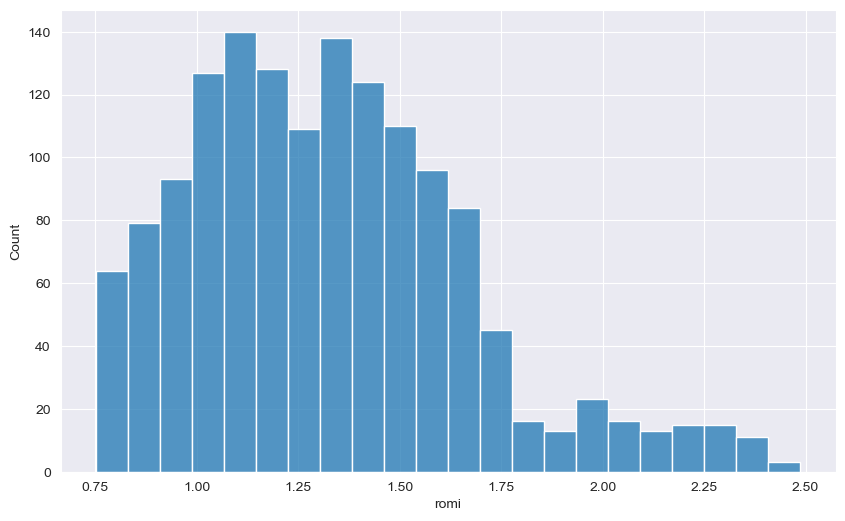

In [86]:
fig=plt.figure(figsize=(10,6))
romi=sns.histplot( x='romi', data=data)


#romi.bar_label(romi.containers[20])
plt.show()

#### 5. Побудуй теплову карту кореляції між усіма числовими показниками в таблиці facebook_ads_data.csv. Які показники мають найвищу та найнижчу кореляцію? З чим корелює "total_value"?
exploratory data analysis

In [87]:
data_corr=data.corr(numeric_only = True)
x=len(data_corr.columns) # calculate the number of parameters to correlate. We need that to exclude self-reference in the table, when select strongest correlation
data_corr_s=data_corr.unstack().sort_values(ascending=False).reset_index() # we need indexes to operate with rows
data_corr_s.columns=['metric','pair','corr_index'] # we need titles to operate with columns
data_corr_s['corr_index']=data_corr_s['corr_index'].round(2) # round Series to show later in the table
data_corr_drop=data_corr_s.drop(data_corr_s.index[0:x]) #remove self-references by drop() with len()


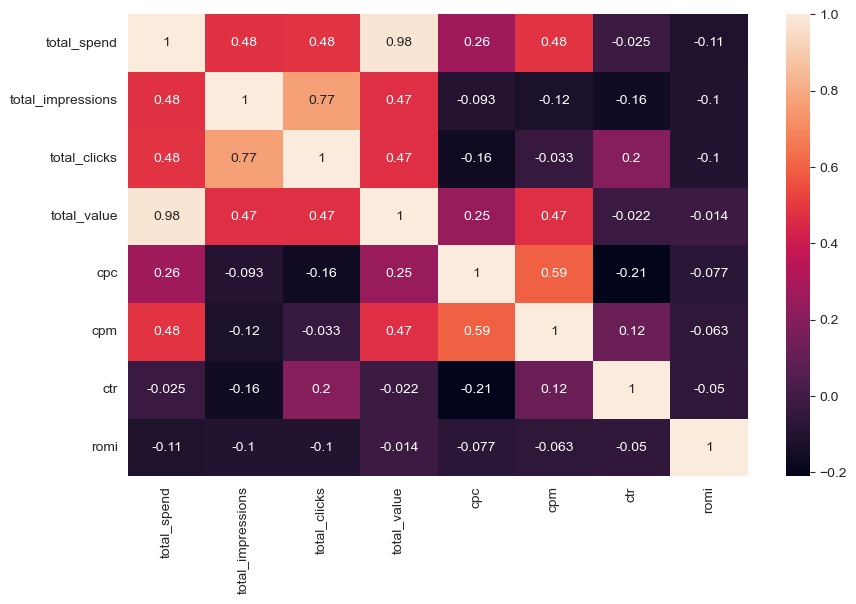

In [88]:
plt.figure(figsize=(10,6))
sns.heatmap(data_corr, annot=True)
plt.show()

Які показники мають найвищу та найнижчу кореляцію? З чим корелює "total_value"?

In [89]:

# A good correlation depends on the use, but it is safe to say you have at least 0.6 (or -0.6) to call it a good correlation. I added "Moderate" just for demo.
# There should be condition for values <=-0.6 (Strong) and >=0.4 (Moderate)
data_corr_drop['corr_quality']=np.where(data_corr_drop['corr_index']>=0.6, 'Strong',
                                        np.where(data_corr_drop['corr_index']<=0.4, "Weak", "Moderate"))
#data_corr_drop['corr_quality']=np.where(data_corr_drop['corr_index']>=0.6, 'Strong', "Weak")

# remove duplicates  like pairs ('total_spend' - 'total_value' and 'total_value' - 'total_spend'
data_corr_noduplicate=data_corr_drop
data_corr_noduplicate['test']=data_corr_noduplicate.apply(lambda x: "".join(sorted(x[0]+x[1])), axis=1)
data_corr_noduplicate=data_corr_noduplicate[~data_corr_noduplicate.test.duplicated()].iloc[:,:4]



In [90]:
#select 3 the largest by abs
corr_strong=data_corr_noduplicate.loc[data_corr_noduplicate['corr_index'].abs().nlargest(3).index]
#corr_strong1=data_corr_noduplicate.loc[data_corr_noduplicate['corr_quality']!='Weak']

corr_strong

,metric,pair,corr_index,corr_quality
8,total_value,total_spend,0.98,Strong
10,total_clicks,total_impressions,0.77,Strong
12,cpc,cpm,0.59,Moderate


In [91]:
corr_weak=data_corr_noduplicate.loc[data_corr_noduplicate['corr_index'].abs().nsmallest(3).index]
corr_weak

,metric,pair,corr_index,corr_quality
34,total_value,romi,-0.01,Weak
36,total_value,ctr,-0.02,Weak
38,ctr,total_spend,-0.03,Weak


З чим корелює "total_value"?

In [92]:
Total_value_cor=data_corr_noduplicate.loc[(data_corr_noduplicate['metric']=='total_value') & (data_corr_noduplicate['corr_quality']=='Strong')]
total_value_cor_pair=Total_value_cor['pair'].values[0]
total_value_cor_index=Total_value_cor['corr_index'].iloc[0].round(2) #.values[0] and .iloc[0] here are the same
from IPython.display import Markdown as md
md(f'**total_value** correlates with **{total_value_cor_pair}** for **{total_value_cor_index}**' )

**total_value** correlates with **total_spend** for **0.98**

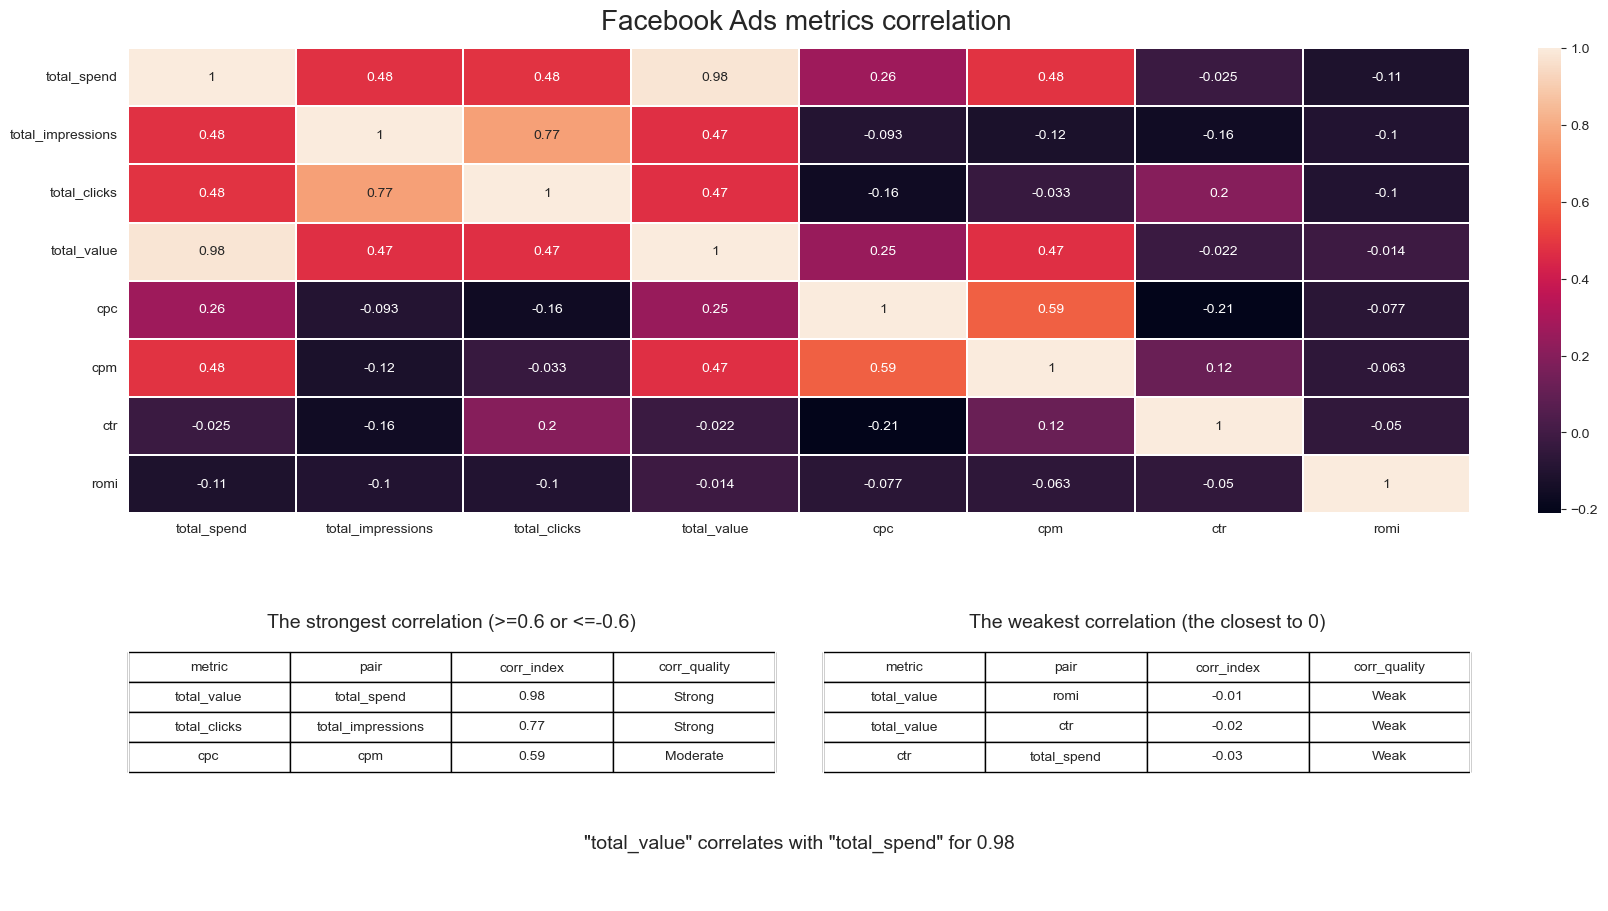

In [93]:
# task 5 all together

fig=plt.figure(figsize=(16,9), constrained_layout=True)

grid_spec=fig.add_gridspec(nrows=3,ncols=2, height_ratios=[4,2,1], width_ratios=[1,1])


ax1 = fig.add_subplot(grid_spec[0,:])

ax2 = fig.add_subplot(grid_spec[1, 0])
ax2.set_facecolor('#FFFFFF')

ax3 = fig.add_subplot(grid_spec[1, -1])
ax3.set_facecolor('#FFFFFF')

ax4 = fig.add_subplot(grid_spec[2,:])
ax4.set_facecolor('#FFFFFF')

sns.heatmap(data_corr, annot=True, ax=ax1, linewidths = .3,  )
# ax=ax1 - positioning of figure in subplt in Seaborn
# linewidths = .3 - adds lines among cells

# More on subplotting in Seaborn here : https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
#ax1.tick_params(axis='x',labelrotation=20) # here there is no need in rotation

strong_corr = ax2.table(cellText=corr_strong.values, colLabels=corr_strong.columns, loc='lower center', cellLoc='center') #locate the table and the text in cells
strong_corr.scale(1,1.75) #change the size of sells
ax2.grid() #remove grid
ax2.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)  #remove ticks
ax2.annotate("The strongest correlation (>=0.6 or <=-0.6)",xy=(0.5, 0.7), va='top', ha='center', fontsize=14) # locate test


weak_corr = ax3.table(cellText=corr_weak.values, colLabels=corr_weak.columns, loc='lower center', cellLoc='center')
weak_corr.scale(1,1.75) #change the size of sells
ax3.grid() #remove grid
ax3.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)  #remove ticks
ax3.annotate("The weakest correlation (the closest to 0)",xy=(0.5, 0.7), va='top', ha='center', fontsize=14) # locate test

ax4.annotate(f'"total_value" correlates with "{total_value_cor_pair}" for {total_value_cor_index}',xy=(0.5, 0.5), va='center', ha='center', fontsize=14)
ax4.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
ax4.grid()

plt.suptitle('Facebook Ads metrics correlation', fontsize=20 )
plt.show()

#### 6. Побудуй точкову діаграму з лінійною регресією 
(для цього ти можеш використати функцію lmplot()), що побудована на даних з "total_spend" та "total_value" щоб візуалізувати звʼязок між цими величинами.

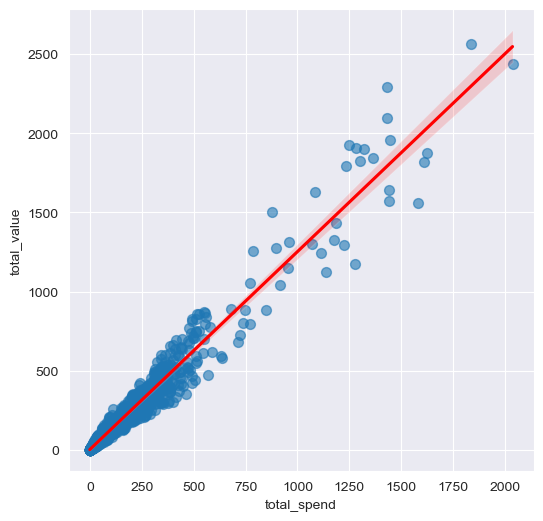

In [94]:
plt.figure(figsize=(6,6))
sns.regplot(x='total_spend', y='total_value', data=data, scatter_kws={'alpha':0.6,'s':50},line_kws={'color':'red'})
#sns.lmplot(x='total_spend', y='total_value', data=data)
# lmplot is the figure-level version of regplot, meaning lmplot always creates its own figure and manages its own subplots based on params like hue and col. 
plt.show()